In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import tensorflow as tf

In [ ]:
train = pd.read_csv('/content/Suicide_Data.csv', encoding='unicode_escape')


In [ ]:

train.replace({"Class": {'non-suicide': 0, 'suicide':1}}, inplace= True)
print(train.head())



X= train.iloc[:,0:1].values
Y= train.iloc[:,1:2].values


X_flat = list(np.concatenate(X). flat)
Y_flat = list(np.concatenate(Y). flat)

X_reshape= np.reshape(X_flat, (-1, 1))
Y_reshape= np.reshape(Y_flat, (-1, 1))


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_reshape,Y_reshape, test_size=.2,random_state=20)
print(X_train)
print(y_train)

                                                Text  Class
0  #27clubi turn 27 in 16 days i wanna leave my w...      1
1  #3737 is the parking stall number my body woul...      1
2  #4girlfriend stayed home to make sure im allri...      1
3  #5decided im too much of pussy to kill myselfi...      1
4  #crazysockz4docsas someone who will one day be...      1
[['anyone up for just talkingim bored and very lonely and slightly very depressed at the moment i dont really have anything to talk about other than how much i want diet coke and what sad sack of shit i am but it would be nice to talk to someone for little while']
 ['aight im going to bed wake up in 2 hours please and if you do i will give you cookie']
 ['all i want to do is be on my ownbeing 16 is enjoyable getting older and being an older teenager is good but i just hate being around people but am almost always forced to whether its not having anyone i can express my misery to or barely coping in social situation without going to 

In [ ]:
tf . print(tf. __version__) 

2.8.2


In [ ]:
!pip install tensorflow==2.8.2
!pip install tensorflow-text==2.8.2
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 15.5 MB/s 


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)

In [ ]:

history_bert= model.fit(X_train, y_train, epochs=5, batch_size = 32, validation_split= 0.2)

Epoch 1/5
187/187 [==============================] - 95s 412ms/step - loss: 0.6053 - accuracy: 0.6691 - precision: 0.6529 - recall: 0.6028 - val_loss: 0.5247 - val_accuracy: 0.7726 - val_precision: 0.7694 - val_recall: 0.7620
Epoch 2/5
187/187 [==============================] - 78s 416ms/step - loss: 0.4985 - accuracy: 0.7766 - precision: 0.7612 - recall: 0.7512 - val_loss: 0.4688 - val_accuracy: 0.8122 - val_precision: 0.7683 - val_recall: 0.8803
Epoch 3/5
187/187 [==============================] - 78s 418ms/step - loss: 0.4551 - accuracy: 0.8050 - precision: 0.7941 - recall: 0.7788 - val_loss: 0.4240 - val_accuracy: 0.8384 - val_precision: 0.8423 - val_recall: 0.8226
Epoch 4/5
187/187 [==============================] - 78s 416ms/step - loss: 0.4253 - accuracy: 0.8248 - precision: 0.8121 - recall: 0.8065 - val_loss: 0.4004 - val_accuracy: 0.8404 - val_precision: 0.8123 - val_recall: 0.8748
Epoch 5/5
187/187 [==============================] - 78s 417ms/step - loss: 0.4072 - accuracy: 0

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted_f = np.where(y_predicted > 0.5, 1, 0)
y_predicted_f

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_predicted_f)) 

Accuracy: 0.8535407725321889


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


labels = ['non-suicidal', 'suicidal']
print(classification_report(y_test, y_predicted_f))
pd.DataFrame(confusion_matrix(y_test, y_predicted_f), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       969
           1       0.86      0.83      0.85       895

    accuracy                           0.85      1864
   macro avg       0.85      0.85      0.85      1864
weighted avg       0.85      0.85      0.85      1864



,non-suicidal,suicidal
non-suicidal,846,123
suicidal,150,745


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predicted_f)
cnf_matrix

array([[846, 123],
       [150, 745]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

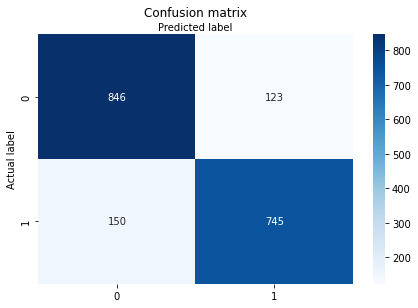

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=plt.cm.Blues ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

59/59 [==============================] - 20s 331ms/step - loss: 0.3844 - accuracy: 0.8535 - precision: 0.8583 - recall: 0.8324


In [ ]:
history_bert.history??

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history_cnn.history['accuracy'])
# plt.plot(history_cnn.history['val_accuracy'])

# # plt.title('model accuracy')
# # plt.ylabel('accuracy')
# # plt.xlabel('epoch')
# # plt.legend(['train_acc','test_acc'], loc='lower left')
# # plt.show()

# plt.plot(history_cnn.history['loss'])
# plt.plot(history_cnn.history['val_loss'])

# plt.title('CNN model accuracy and loss')
# # plt.ylabel('loss')
# # plt.xlabel('epoch')
# plt.legend(['train_acc','test_acc','train_loss','test_loss'], fontsize=8)
# plt.show()

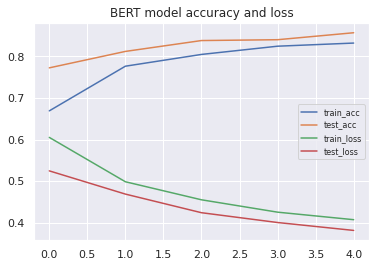

In [ ]:

%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

plt.plot(history_bert.history['accuracy'])
plt.plot(history_bert.history['val_accuracy'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train_acc','test_acc'], loc='lower left')
# plt.show()

plt.plot(history_bert.history['loss'])
plt.plot(history_bert.history['val_loss'])

plt.title('BERT model accuracy and loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train_acc','test_acc','train_loss','test_loss'], fontsize=8)

plt.show()

